### Top ten restaurants from all regions

In this section, We used spark to read the JSON database and create a dataframe. First, we selected the required columns (name, categories, review_count, stars) from this dataframe. Because the categories in the data not only include restaurants, but also many other businesses. So we extracted `Restaurants and food` as keywords. To filter out restaurants with too few user reviews, here we filter out restaurants with less than 100 reviews. Finally, sort according to (stars and review count) and finally take out the top ten.

> ##### Load data from Json file
>
> ```python
> text = spark.read.json('archive/yelp_academic_dataset_business.json').repartition(8)
> ```
>
> ###### Get Top ten rated Restaurant 
>
> ```python
> business = text.select(text.name,text.categories,text.review_count,text.stars)
> restaurant = business.filter(business.categories.like('%Restaurants%'))
> restaurant = restaurant.filter(restaurant.review_count >= 100)
> restaurant = restaurant.sort(desc('stars'),desc('review_count'))
> #save to csv file
> restaurant.limit(10).write.csv('topTenRatedRes.csv')
> ```
>
> ```shell
> +--------------------+--------------------+------------+-----+
> |                name|          categories|review_count|stars|
> +--------------------+--------------------+------------+-----+
> |     Little Miss BBQ|Barbeque, Restaur...|        2329|  5.0|
> |        Brew Tea Bar|Restaurants, Food...|        1827|  5.0|
> |     Cocina Madrigal|Restaurants, Mexican|        1107|  5.0|
> |Green Corner Rest...|Restaurants, Hala...|         858|  5.0|
> |      Worth Takeaway|Breakfast & Brunc...|         842|  5.0|
> |      Zenaida's Cafe|Cafes, Breakfast ...|         717|  5.0|
> |     Kodo Sushi Sake|Sushi Bars, Resta...|         695|  5.0|
> |Bajamar Seafood &...|Fast Food, Dive B...|         658|  5.0|
> |              Karved|Restaurants, Sand...|         651|  5.0|
> +--------------------+--------------------+------------+-----+
> ```
>
> ##### Show the bar chat
>
> ```python
> respd.head(10).set_index('name').plot.barh(stacked=True)
> ```
>
> 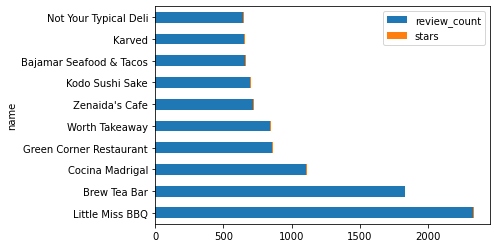
>
> asd

### Visualization of the most viewed Restaurants in each city

We used `dash` and `plotly. express` to mark the most popular restaurants in each city on the map. Different states can be selected in the dropdown menu. After selection, the map will jump to the position of this state and display the most popular restaurants in each city in this state. When the mouse is moved to the point representing each restaurant, the name, city, and other information about the restaurant will be displayed.

> ##### Get the most popular restaurant in each city
>
> ```python
> viewRegion = text.select(text.name,text.categories,text.review_count,text.city,text.state,text.stars,text.latitude,text.longitude)
> 
> viewRegion = viewRegion.filter(business.categories.like('%Restaurants%'))
> maxReview = viewRegion.groupBy('city').agg({'review_count':'max'})
> maxReview = maxReview.sort('max(review_count)',ascending=False)
> 
> final = viewRegion.join(maxReview,(maxReview.city == viewRegion.city) & (maxReview['max(review_count)'] == viewRegion.review_count)).drop(maxReview.city).withColumnRenamed('max(review_count)','Max Review')
> 
> final = final.sort('Max Review',ascending=False)
> final.coalesce(1).write.csv('mostViewedRes',mode='overwrite')
> final.show()
> vrp = final.select("*").toPandas()
> vrp.head(100)
> ```
>
> |      |                        name |                                        categories | review_count | state | stars |  latitude |   longitude |               city | Max Review |
> | ---: | --------------------------: | ------------------------------------------------: | -----------: | ----: | ----: | --------: | ----------: | -----------------: | ---------: |
> |    0 |            Bacchanal Buffet | Sandwiches, Breakfast & Brunch, Food, Restaura... |        10129 |    NV |   4.0 | 36.115929 | -115.176238 |          Las Vegas |      10129 |
> |    1 |      Snooze, An A.M. Eatery | Breakfast & Brunch, Coffee & Tea, Sandwiches, ... |         3515 |    AZ |   4.0 | 33.508204 | -112.037033 |            Phoenix |       3515 |
> |    2 |   Pai Northern Thai Kitchen | Restaurants, Thai, Specialty Food, Food, Ethni... |         2758 |    ON |   4.5 | 43.647866 |  -79.388685 |            Toronto |       2758 |
> |    3 |                  Schwartz's | Sandwiches, Specialty Food, Restaurants, Food,... |         2667 |    QC |   4.0 | 45.516353 |  -73.577642 |           Montréal |       2667 |
> |    4 |             Studio B Buffet | Desserts, Seafood, Specialty Food, Food, Resta... |         2456 |    NV |   4.0 | 35.965072 | -115.167980 |          Henderson |       2456 |
> |  ... |                         ... |                                               ... |          ... |   ... |   ... |       ... |         ... |                ... |        ... |
> |   95 |       Oak and Embers Tavern |  Beer Bar, Bars, Nightlife, Restaurants, Barbeque |          262 |    OH |   4.0 | 41.521822 |  -81.355998 |        Chesterland |        262 |
> |   96 |       English Rose Tea Room |             Food, British, Tea Rooms, Restaurants |          262 |    AZ |   4.5 | 33.824936 | -111.923786 |           Carefree |        262 |
> |   97 |               Primanti Bros | Chicken Wings, Restaurants, American (Traditio... |          255 |    PA |   3.5 | 40.506615 |  -80.222705 |      Moon Township |        255 |
> |   98 |         Geraci's Restaurant |                       Pizza, Italian, Restaurants |          255 |    OH |   3.5 | 41.498216 |  -81.536786 | University Heights |        255 |
> |   99 | BJ's Restaurant & Brewhouse | Pubs, American (New), Nightlife, Restaurants, ... |          250 |    PA |   3.5 | 40.345052 |  -80.055458 |  Upper Saint Clair |        250 |
>
> 100 rows × 9 columns
>
> ##### Load data
>
> ```python
> #for mac
> """plot = pd.read_csv('mostViewedRes/part-00000-e7cc569e-0577-4169-8d5e-06d6f738266c-c000.csv',\
>                    names=['name','categories','review_count','state','stars',\
>                           'latitude','longitude','city','MaxReview'])
> """
> #for windows
> plot = pd.read_csv('mostViewdRes\\part-00000-e7cc569e-0577-4169-8d5e-06d6f738266c-c000.csv',\
>                    names=['name','categories','review_count','state','stars',\
>                           'latitude','longitude','city','Maxeview'])
> ```
>
> ##### Build the map app
>
> ```python
> app.layout = html.Div([
>     dcc.Dropdown(
>         id = 'state_choice',
>         value='NV',
>         options = [{'label':i,'value':i} for i in state_array]
>     ),
>     dcc.Graph(id='myGraph'),
> ])
> 
> @app.callback(
>     Output('myGraph','figure'),
>     [Input('state_choice','value')]
> )
> 
> def update_figure(state_choice):
>     df = plot.loc[plot['state'] == state_choice]
>     
>     mapbox_token = 'pk.eyJ1IjoieGlhb2Jhb3Nhbmd1byIsImEiOiJja2hlMjJ0N3MwMTB4MnFxZWFrZWdoa2NmIn0.cwqsW5Zfj_ZOBtun0yQz4A'
>     px.set_mapbox_access_token(mapbox_token)
>     
>     fig = px.scatter_mapbox(df,lat='latitude',lon='longitude',hover_name='name',hover_data=['MaxReview','city'],\
>                         color_discrete_sequence=['#FF00FF'],zoom=7,mapbox_style='dark')
>     
>     fig.update_layout(
>         title = 'Popular Restaurants in ' + state_choice,
>         #autosize = True,
>         mapbox_style='dark',
>         mapbox_accesstoken=mapbox_token
>     )
>     
>     return fig
> ```
>
> ![alt text](demo_dash.png "Demo Dash with Map")

